### Assignment

1. Your task is to apply k-means on iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than three clusters that is still better at tracking the real trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### Setting k=4

In [2]:
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

32.2 ms ± 773 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


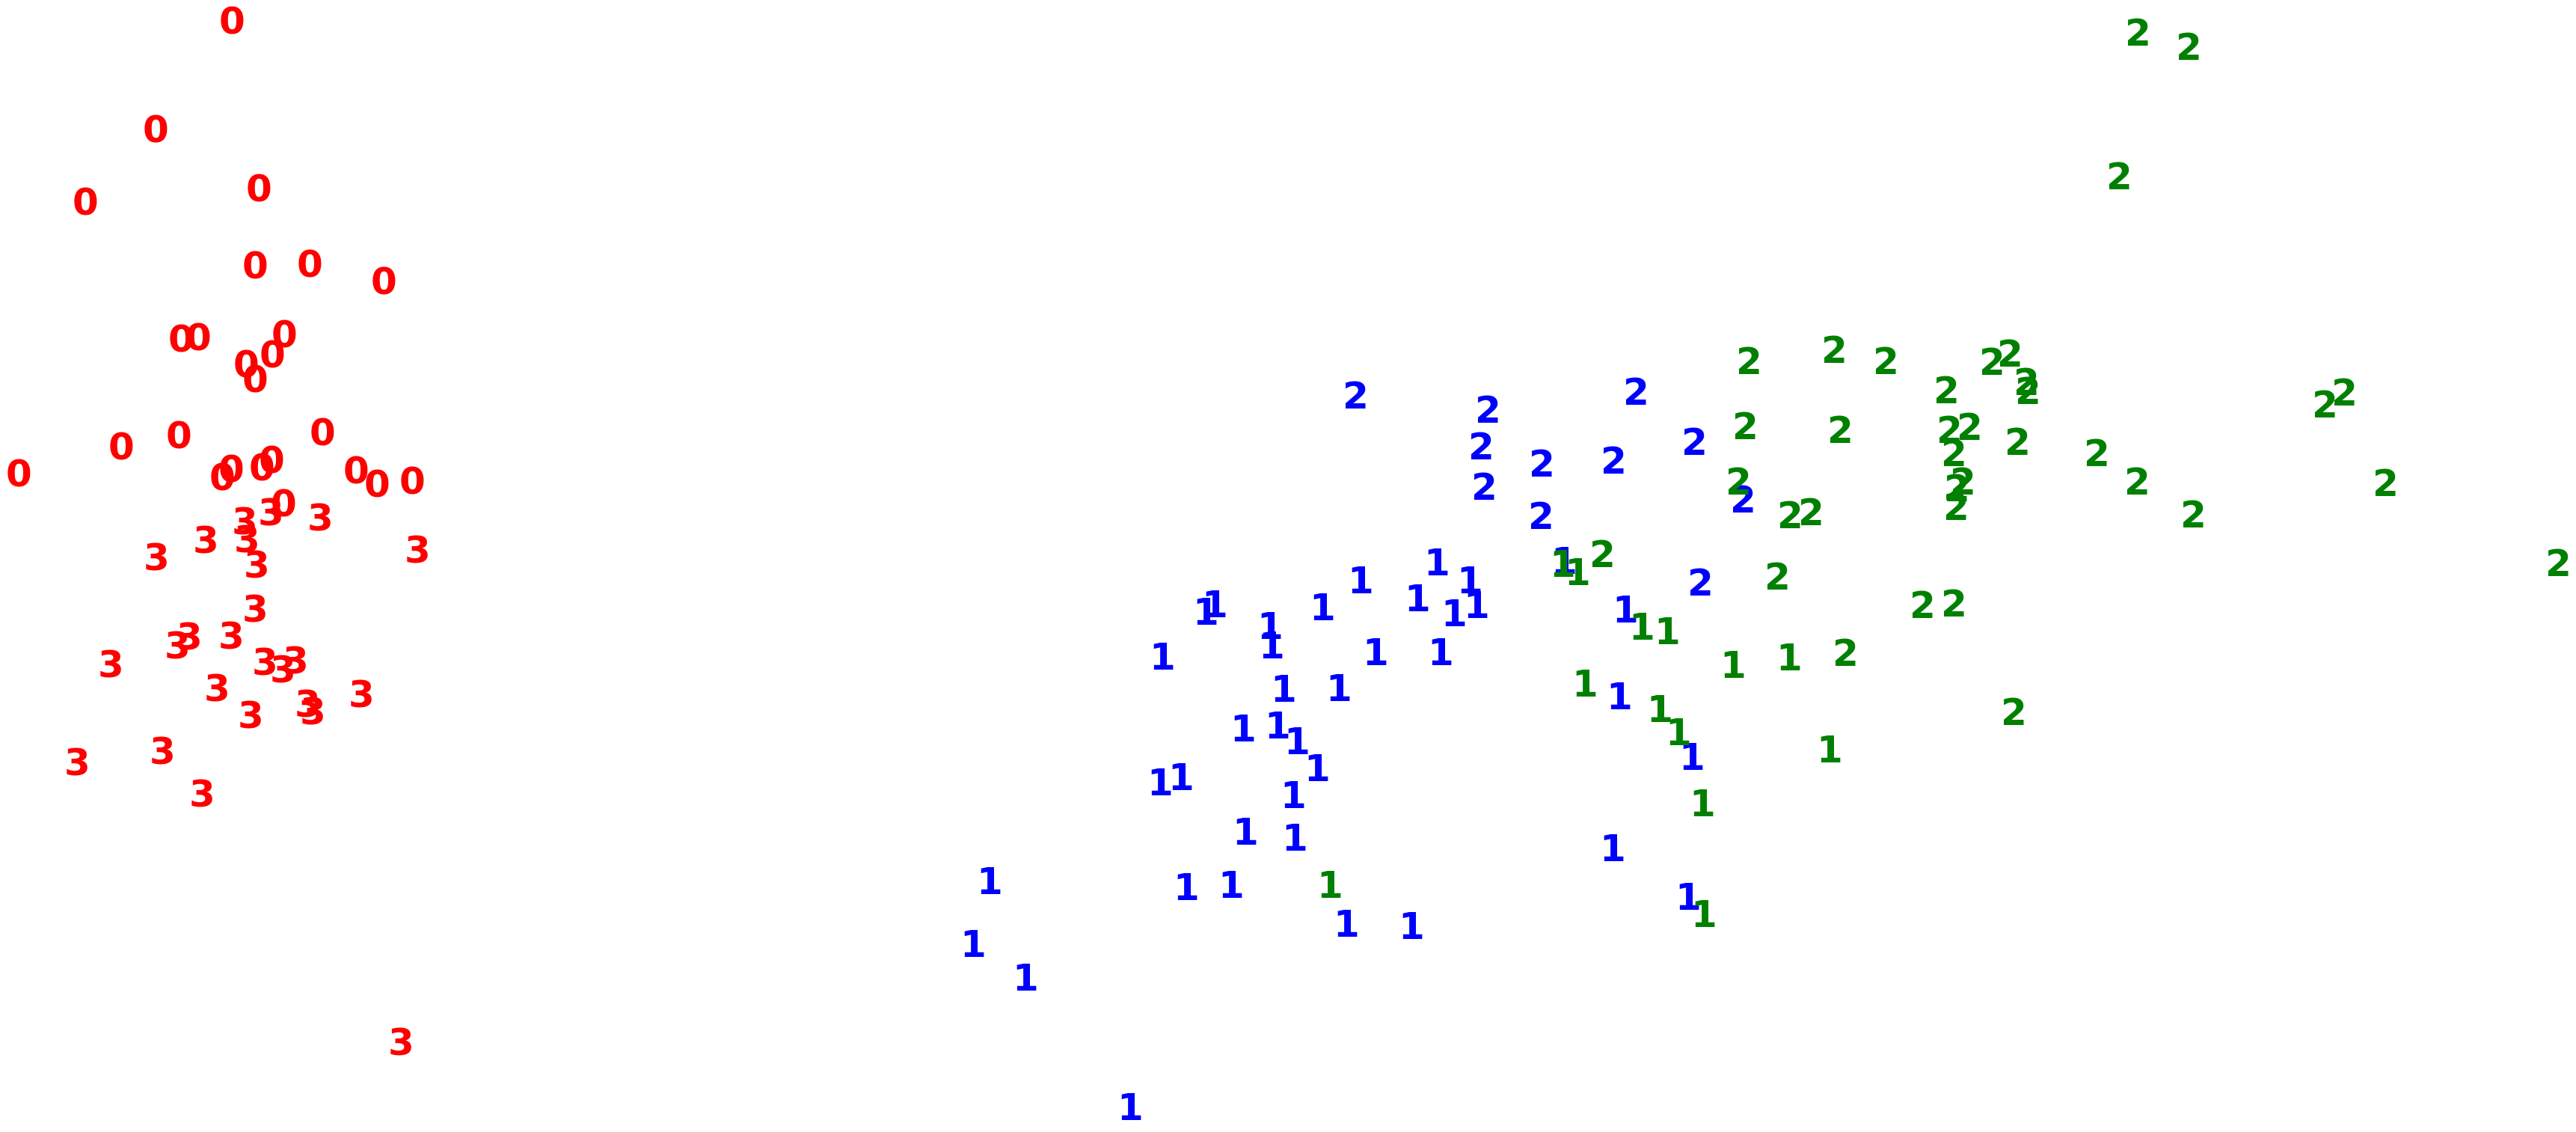

In [3]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#### Setting k=5

In [4]:
kmeans_cluster2 = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_cluster2.fit(X_std)
y_pred2 = kmeans_cluster2.predict(X_std)

39.8 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


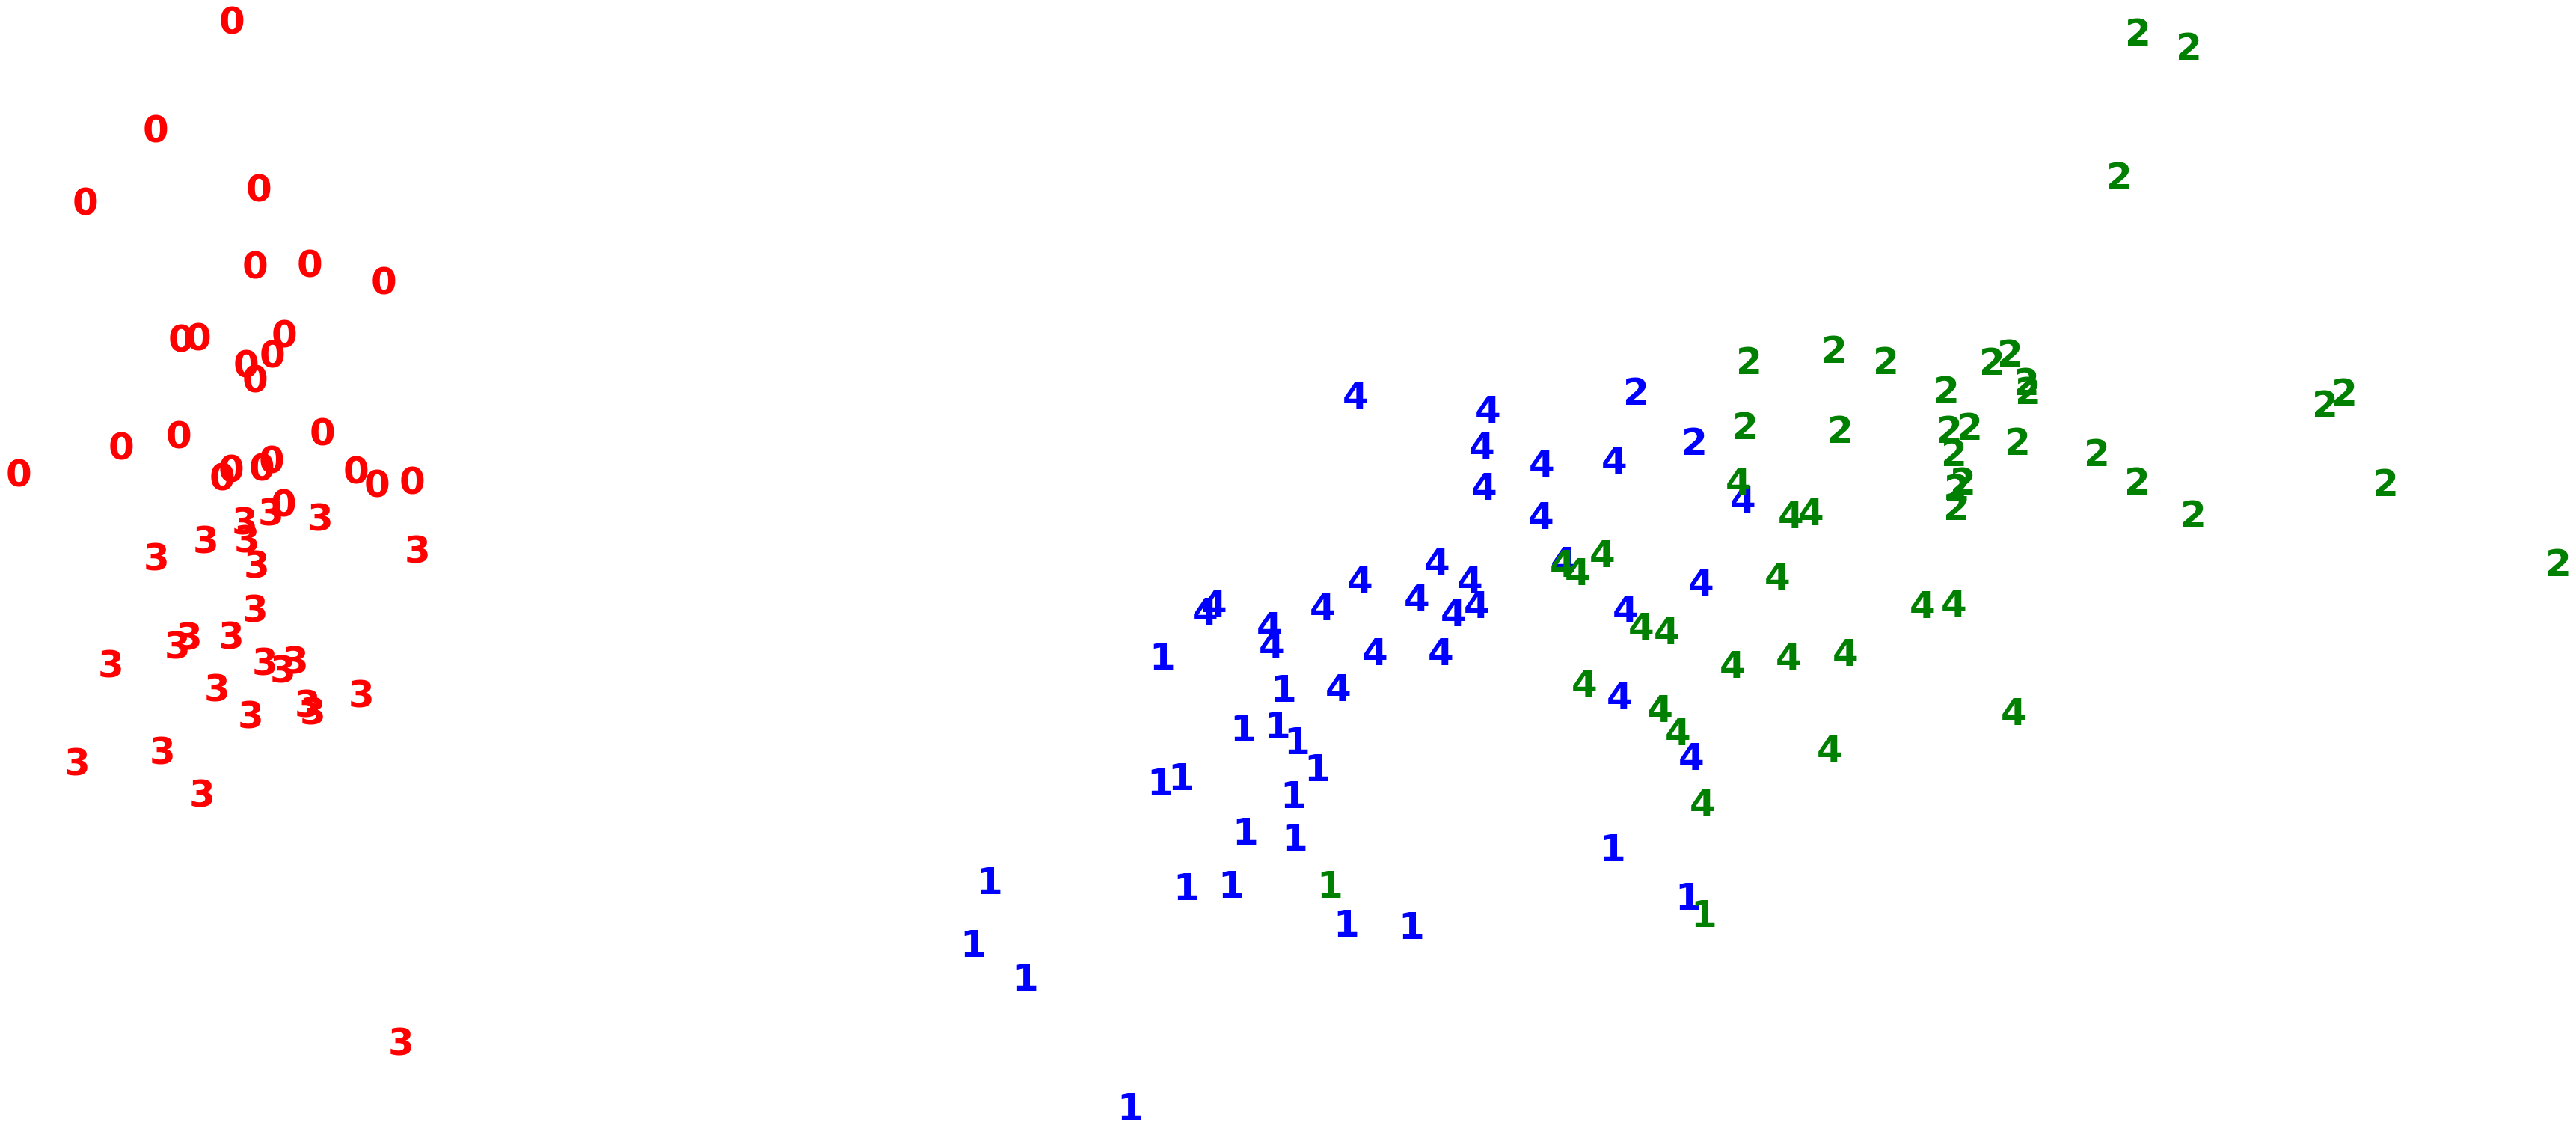

In [5]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred2[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

#### Setting k=6

In [6]:
kmeans_cluster3 = KMeans(n_clusters=6, random_state=123)

# Fit model
%timeit kmeans_cluster3.fit(X_std)
y_pred3 = kmeans_cluster3.predict(X_std)

54.8 ms ± 3.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


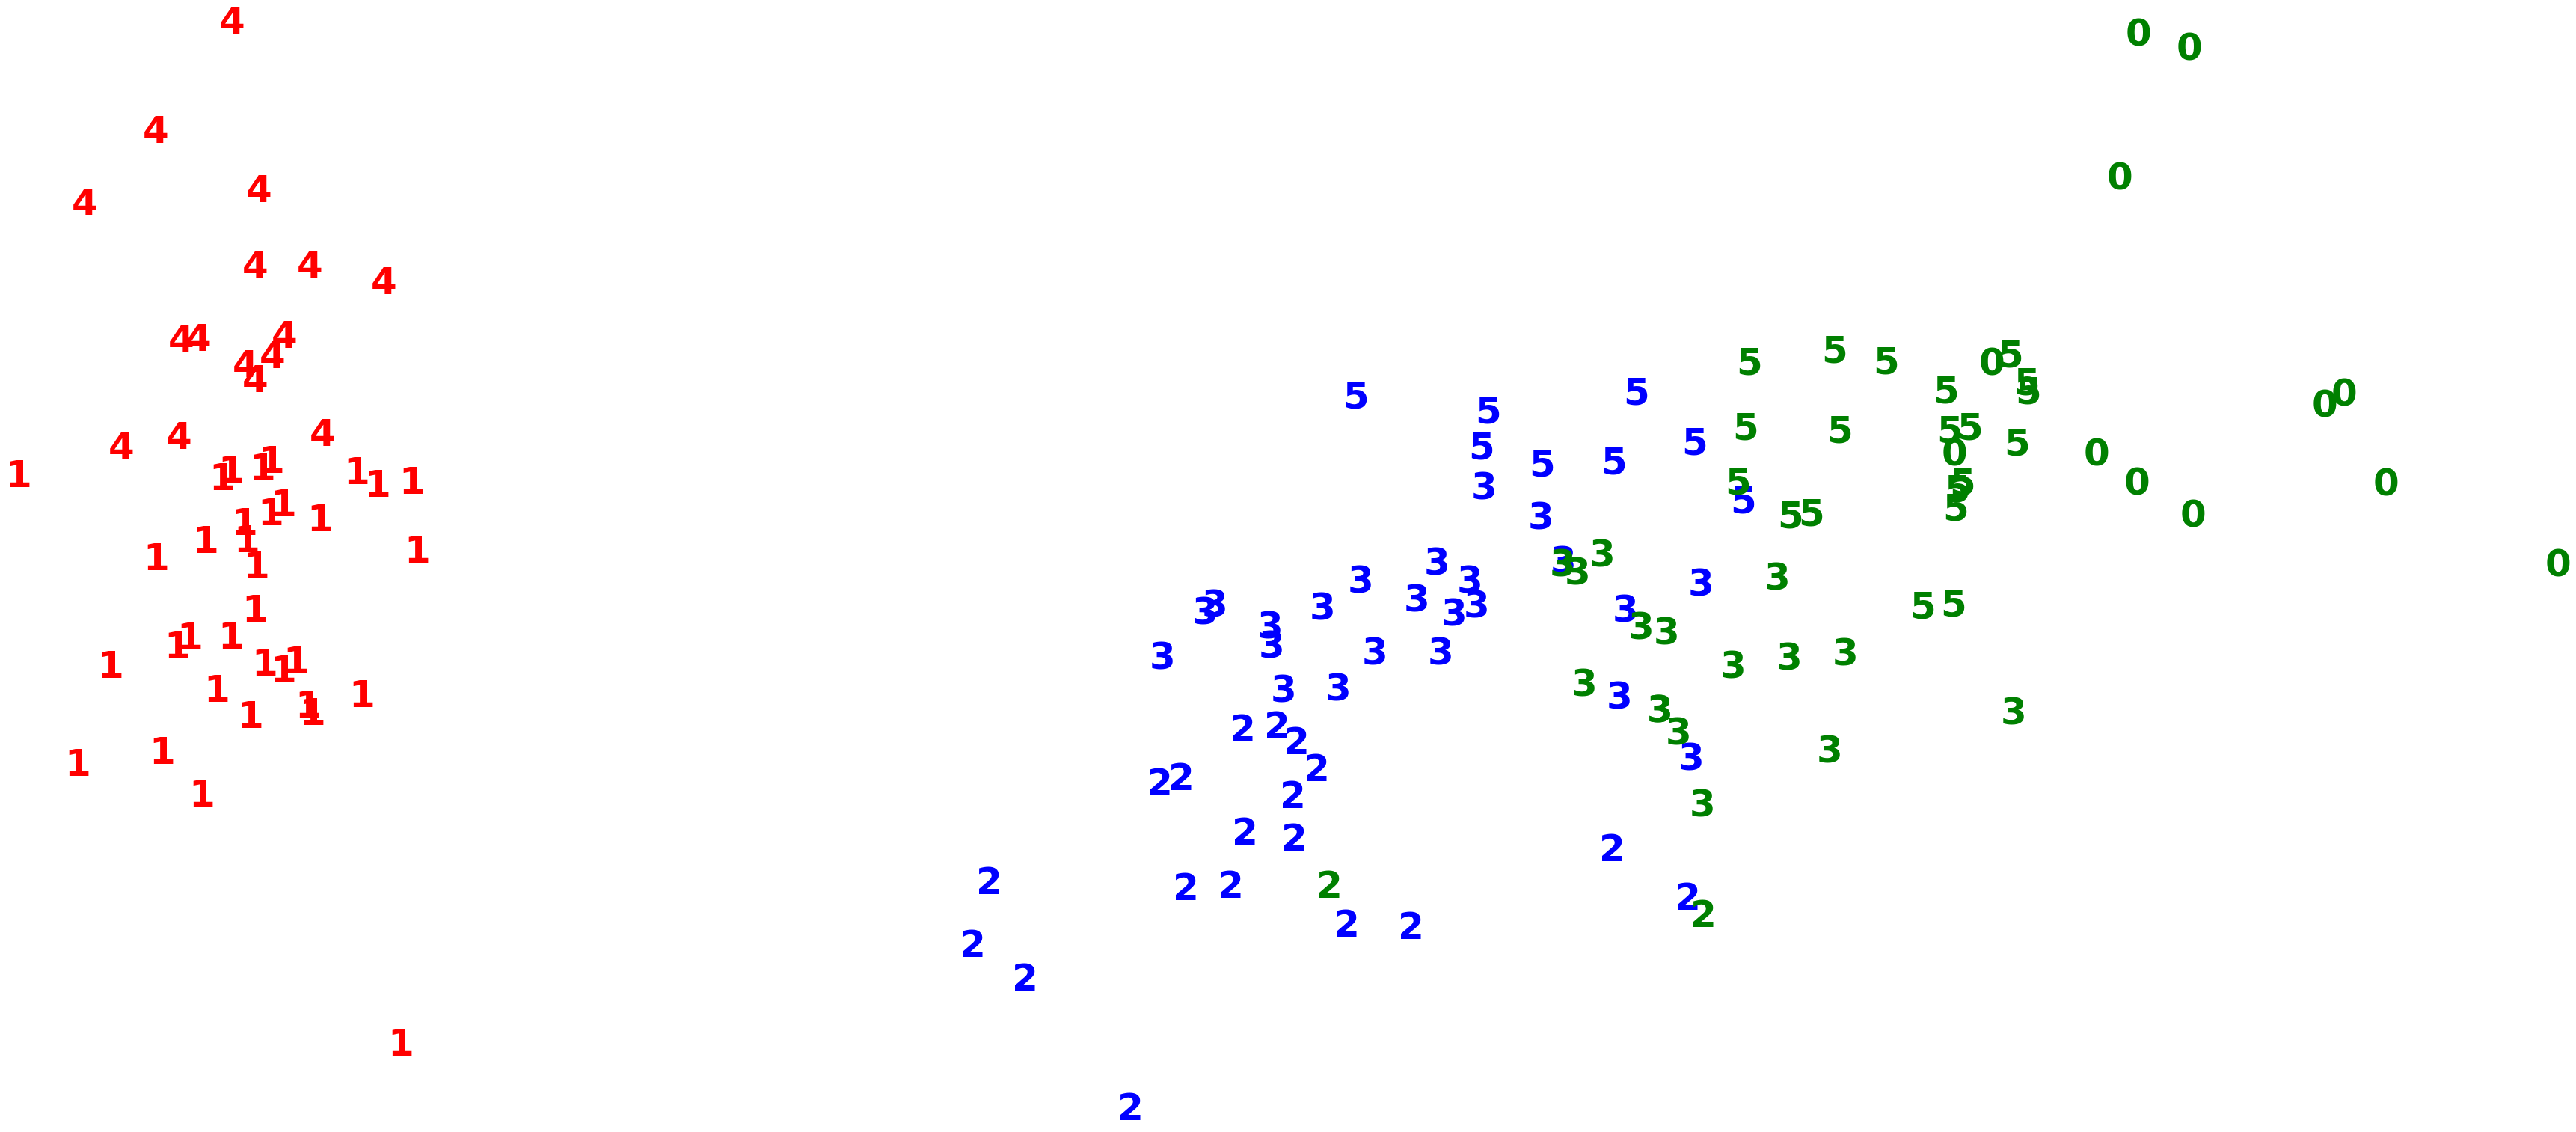

In [7]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred3[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**Comment:** As k increases, run time increases this means the complexity increases. However, I did not observe an increase in predictive power of the algorithm since it can not still perfectly seperate blue and green clusters. There is no important improvement when we increase k. 

2. In this assignment, you work with the [heart disease data](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository. This dataset contains the records of the patients such that some of them have heart disease and some of them have not. Your task is to create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will not use the information whether the patients have heart disease or not.

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 
             'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] 


In [8]:
data = pd.read_csv('cleveland-0_vs_4.dat', names = col_names)

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [10]:
data.replace('negative', 0, inplace=True)
data.replace('positive', 1, inplace=True)

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 19.5+ KB


In [13]:
data[data.thal == '<null>'].thal

44    <null>
Name: thal, dtype: object

In [14]:
data.thal[40:50]

40       3.0
41       3.0
42       3.0
43       3.0
44    <null>
45       3.0
46       3.0
47       7.0
48       3.0
49       3.0
Name: thal, dtype: object

In [15]:
df1= data.copy()
df1.loc[44,'thal'] =3
df1.loc[85, 'ca'] =0
df1.loc[142, 'ca'] =0
df1.loc[146, 'ca'] =0


In [16]:
df1.to_csv('heart_disease.csv', index=False)

In [17]:
df1= df1.drop(columns='num', )

In [18]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df1)

In [19]:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(df_std)
y_pred = kmeans_cluster.predict(df_std)

41.4 ms ± 5.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
accuracy_score(full_pred, y_pred)

0.6101694915254238

In [26]:
confusion_matrix(full_pred, y_pred)

array([[12,  1],
       [68, 96]])

In [22]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0], dtype=int32)

In [23]:
data.num

0      0
1      0
2      0
3      0
4      0
      ..
172    1
173    1
174    1
175    1
176    1
Name: num, Length: 177, dtype: int64

In [25]:
full_pred = np.array([0 if x == 1 else 1 for x in data.num])

